In [372]:
import random
import matplotlib.pyplot as plt

def calcbeta(alpha, beta, maximum, offset = 0):
    return [round(maximum * random.betavariate(alpha, beta)) + offset for i in range(500)]

def plotbeta(betas, cumulative = False):
    hist = plt.hist(betas, max(betas) - min(betas), density = True, histtype = 'step')
    if cumulative:
        plt.hist(betas, max(betas) - min(betas), density = True, histtype = 'step', cumulative = True)
    return hist

[array([0.746, 0.254]), array([0., 1.])]
[array([0.708, 0.212, 0.08 ]), array([1., 2., 3.])]


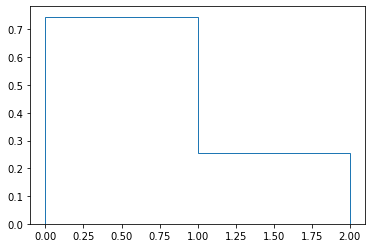

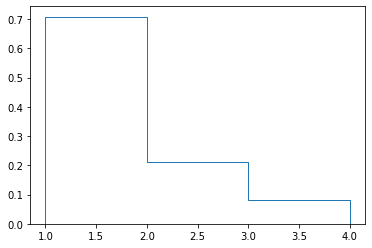

In [369]:
# works from home / rarely leaves
beta = calcbeta(0.3, 2, 3)
hist = plotbeta(beta)
p1_week = [hist[0], hist[1][:-1]]
print(p1_week)

# works outside / rarely leaves
beta = calcbeta(0.3, 2, 3, 1)
plt.figure(2)
hist = plotbeta(beta)
p2_week = [hist[0], hist[1][:-1]]
print(p2_week)

[array([0.534, 0.282, 0.184]), array([0., 1., 2.])]
[array([0.498, 0.292, 0.21 ]), array([1., 2., 3.])]


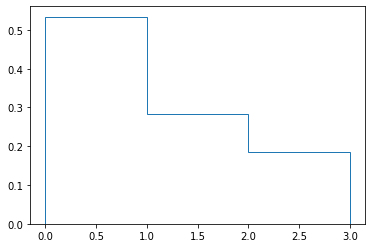

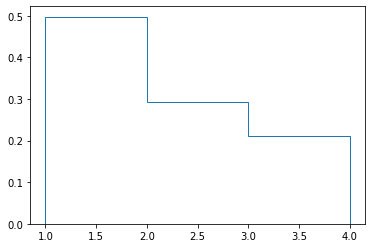

In [370]:
# works from home / leaves often
beta = calcbeta(0.5, 1.5, 3)
hist = plotbeta(beta)
p3_week = [hist[0], hist[1][:-1]]
print(p3_week)

# works outside / leaves often
beta = calcbeta(0.5, 1.5, 3, 1)
plt.figure(2)
hist = plotbeta(beta)
p3_week = [hist[0], hist[1][:-1]]
print(p3_week)

[array([0.334, 0.46 , 0.206]), array([0., 1., 2.])]
[array([0.292, 0.464, 0.244]), array([1., 2., 3.])]


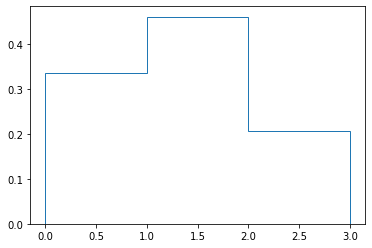

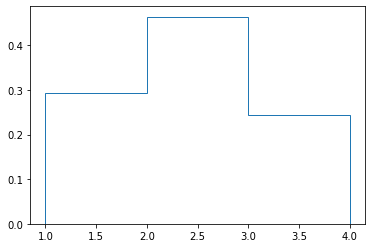

In [371]:
# works from home / leaves very often
beta = calcbeta(1, 2, 3)
hist = plotbeta(beta)
p4_week = [hist[0], hist[1][:-1]]
print(p4_week)

# works outside / leaves very often
beta = calcbeta(1, 2, 3, 1)
plt.figure(2)
hist = plotbeta(beta)
p4_week = [hist[0], hist[1][:-1]]
print(p4_week)

In [94]:
import heapq

In [85]:
class building:
    def __init__(self, floors = 18):
        self.floors = floors
        self.floorheight = 4.1

    def createElevator(self, spd, acc, jerk, cap):
        self.elevator = elevator(spd, acc, jerk, cap)

class person:
    def __init__(self, floor):
        self.floor = floor
        self.weekday = choice(profiles_weekdays, weights)
        self.weekend = choice(profiles_weekends, weights)

class elevator:
    def __init__(self, spd = 3, acc = 1.5, jerk = 1.6, cap = 4):
        self.spd_max = spd
        self.acc_max = acc
        self.jerk_max = jerk
        self.cap = cap
        self.count = 0
        self.order_down = []
        self.order_up = []
        self.floor = 0
        self.direction = 0  # -1 down, 0 still, 1 up

    def push(self, destination):
        if destination > self.floor:
            try:
                self.order_up.index(destination)
            except ValueError:
                # destination is not yet in the heaps
                heapq.heappush(self.order_up, destination)
        else:
            try:
                self.order_down.index(- destination)
            except ValueError:
                # destination is not yet in the heaps
                heapq.heappush(self.order_down, - destination) # negative values for a max heap
        
        if self.direction == 0:
            if len(self.order_up) > 0:
                self.direction = 1
            elif len(self.order_down) > 0:
                self.direction = -1
    
    def peek(self):
        if self.direction == 1:
            return self.order_up[0]
        elif self.direction == -1:
            return - self.order_down[0]
        
    def board(self, person):
        if self.count < self.cap:
            self.push(person.destination)
            self.count = self.count + 1
            return True
        else:
            return False

    def disembark(self):
        self.count = self.count - 1
        if self.direction == -1:
            heapq.heappop(order_down)
            if len(order_down) == 0:    # reached final down destination
                if len(order_up) > 0:   # if there are up destinations in queue
                    direction = 1
                else:                   # there are no destionations in queue
                    direction = 0
        else:
            heapq.heappop(order_up)
            if len(order_up) == 0:    # reached final up destination
                if len(order_down) > 0:   # if there are down destinations in queue
                    direction = -1
                else:                   # there are no destionations in queue
                    direction = 0


mybuilding = building(18)
mybuilding.createElevator(3, 1.5, 1.6, 4)

## main loop


In [86]:
mybuilding.elevator.floor = 10
mybuilding.elevator.push(6)
mybuilding.elevator.push(7)
mybuilding.elevator.push(5)
mybuilding.elevator.push(11)
print(mybuilding.elevator.order_up)
print(mybuilding.elevator.order_down)

[11]
[-7, -6, -5]


In [87]:
mybuilding.elevator.peek()

7

End floor: 19.998634906354457


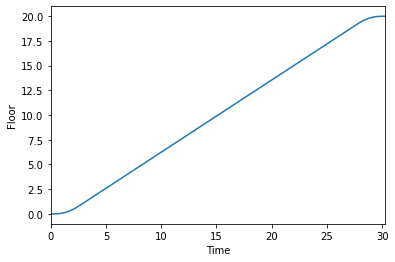

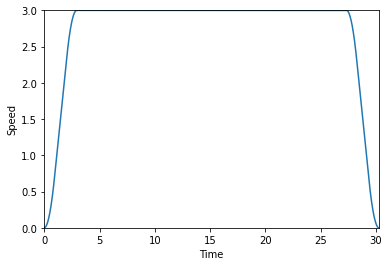

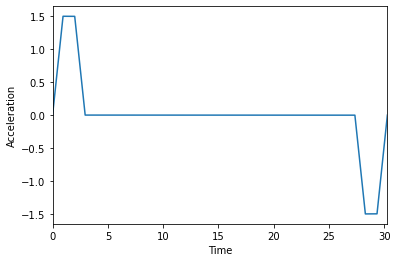

In [148]:
import numpy as np
import matplotlib.pyplot as plt

sqrt = np.sqrt
zeros = np.zeros
linspace = np.linspace

class physics:
    def __init__(self):
        self.spd_max = 3
        self.acc_max = 1.5
        self.jerk_max = 1.6
        self.elevatorFloor = 0
        self.floorHeight = 4.1
        self.debug = False

    def inc_acc(self, a_in, dt, a_des):
        if a_in + self.jerk_max * dt < a_des:
            a_out = a_in + self.jerk_max * dt
        elif a_in < a_des:
            a_out = a_des
        else:
            a_out = a_in
        return a_out

    def dec_acc(self, a_in, dt, a_des):
        if a_in - self.jerk_max * dt > - a_des:
            a_out = a_in - self.jerk_max  * dt
        elif a_in > - a_des:
            a_out = - a_des
        else:
            a_out = a_in
        return a_out

    def inc_spd(self, v_in, acc, v_travel):
        if v_in + acc < v_travel:
            v_out = v_in + acc
        elif v_in < v_travel:
            v_out = v_travel
        else:
            v_out = v_in
        return v_out

    def dec_spd(self, v_in, acc, v_travel):
        if v_in + acc > - v_travel:
            v_out = v_in + acc
        elif v_in > - v_travel:
            v_out = - v_travel
        else:
            v_out = v_in
        return v_out

    def updateFloor(self, dist):
        newFloor = self.elevatorFloor + dist / self.floorHeight
        self.elevatorFloor = newFloor

    def moveElevator(self, destination, position):
        nsteps = (destination - position + 2) * 5000
        vm = self.spd_max
        am = self.acc_max
        jm = self.jerk_max
        d = self.floorHeight * abs(destination - self.elevatorFloor)
        v_travel = sqrt(d * am / 2)     # maximum speed employed on this trip
        v_travel = min(v_travel, vm)
        aj = am / jm

        if d <= 0.6 * self.floorHeight: # maximum distance that can be travelled without reaching maximum acceleration
            # TODO
            raise ValueError('Movement below required threshold')
        else:
            t1 = aj
            t2 = v_travel/am - aj
            t3 = t1
            d1 = 1/6 * aj ** 2 * am
            d2 = v_travel ** 2 / (2 * am) - 1/2 * v_travel * aj
            d3 = v_travel * aj - am / 6 * aj ** 2
            d5 = v_travel * aj - am * aj ** 2 / 6
            d6 = d2
            d7 = 4/6 * am * aj ** 2 - am / 2 * aj ** 2

        t_acc = t1 + t2 + t3
        t_deacc = t_acc
        d_acc = d1 + d2 + d3
        d_deacc = d5 + d6 + d7
        t_travel = (d - d_acc - d_deacc) / v_travel
        t = t_acc + t_deacc + t_travel
        dt = t / nsteps
        n1 = round(t1 / dt)
        n2 = round(t2 / dt)
        n3 = n1
        
        nt = nsteps - 2 * (n1 + n2 + n3)

        a_plot = zeros(nsteps)
        v_plot = zeros(nsteps)
        f_plot = zeros(nsteps)
        t_plot = linspace(0, t, nsteps, False)
        f_plot[0] = self.elevatorFloor

        acc = 0
        v = 0
        c = zeros(6)
        if destination > self.elevatorFloor:
            ## Movement Loop
            for i in range(0, nsteps):
                if i < n1 - 1:
                    ## 1 - increasing acc and spd
                    c[0] = c[0] + 1
                    acc = self.inc_acc(acc, dt, am)
                    v = self.inc_spd(v, acc * dt, v_travel)
                elif i <= n1 + n2:
                    ## 2 - increasing spd
                    c[1] = c[1] + 1
                    v = self.inc_spd(v, acc * dt, v_travel)
                elif i <= n1 + n2 + n3:
                    ## 3 - increasing spd and decreasing acc
                    c[2] = c[2] + 1
                    acc = self.dec_acc(acc, dt, 0)
                    v = self.inc_spd(v, acc * dt, v_travel)
                elif i >= nsteps - n3 - n2 - n1 - 1 and i < nsteps - n2 - n1 - 1:
                    ## 1' - decreasing acc and spd
                    c[3] = c[3] + 1
                    acc = self.dec_acc(acc, dt, am)
                    v = self.dec_spd(v, acc * dt, 0)
                elif i >= nsteps - n2 - n1 - 1 and i <= nsteps - n1:
                    ## 2' - decreasing spd
                    c[4] = c[4] + 1
                    v = self.dec_spd(v, acc * dt, 0)
                elif i > nsteps - n1 and i <= nsteps:
                    ## 3' - increasing acc and decreasing spd
                    c[5] = c[5] + 1
                    acc = self.inc_acc(acc, dt, 0)
                    v = self.dec_spd(v, acc * dt, 0)
                else:
                    pass # mantaining velocity
                    
                self.updateFloor(v * dt)
                a_plot[i] = acc
                v_plot[i] = v
                f_plot[i] = self.elevatorFloor
        else:
            # going down
            pass

        ## Final plot
        plt.figure(1)
        plt.plot(t_plot, f_plot)
        plt.xlim(0, t_plot[-1])
        plt.xlabel('Time')
        plt.ylabel('Floor')
        
        plt.figure(2)
        plt.plot(t_plot, v_plot)
        plt.xlim(0, t_plot[-1])
        plt.ylim(0, vm)
        plt.xlabel('Time')
        plt.ylabel('Speed')
        
        plt.figure(3)
        plt.plot(t_plot, a_plot)
        plt.xlim(0, t_plot[-1])
        plt.ylim(-am*1.1, am*1.1)
        plt.xlabel('Time')
        plt.ylabel('Acceleration')
        
        # Debug
        if self.debug:
            print('TIMES')
            print([t1, t2, t3])
            print(c*dt)
            print('DISTANCES')
            print('expected:', [d1, d1 + d2, d1 + d2 + d3])
            print('measured:', [f_plot[n1]*self.floorHeight,f_plot[n1+n2]*self.floorHeight,f_plot[n1+n2+n3]*self.floorHeight])
            print('expected:', [d5, d6, d7])
            print('measured:', [(f_plot[nsteps-n2-n1]-f_plot[nsteps-n3-n2-n1])*self.floorHeight,(f_plot[nsteps-n1]-f_plot[nsteps-n2-n1])*self.floorHeight,(f_plot[nsteps-1]-f_plot[nsteps-n1])*self.floorHeight])

engine = physics()
engine.moveElevator(20, 0)
print('End floor:', engine.elevatorFloor)
